# Análisis de UMAP (Uniform Manifold Approximation and Projection)

## Introducción

UMAP (Uniform Manifold Approximation and Projection) es una técnica moderna de reducción de dimensionalidad que, similar a t-SNE, es excelente para visualización. Sin embargo, UMAP generalmente es más rápido y mejor en preservar tanto la estructura local como la global de los datos.


## 1. Importar Librerías Necesarias

In [1]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from umap import UMAP
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("Librerías importadas correctamente")

Librerías importadas correctamente


## 2. Cargar y Explorar los Datos

Utilizaremos el mismo dataset de Cáncer de Mama de Wisconsin para comparar UMAP con t-SNE.

In [2]:
# Cargar los datos (ruta relativa al proyecto)
import os
data_path = os.path.join('Data', 't-SNE_UMAP-data', 'data.csv')
df = pd.read_csv(data_path)

print("✓ Datos cargados correctamente")
print(f"\nResumen del dataset:")
print(f"- Muestras: {df.shape[0]}")
print(f"- Características: {df.shape[1] - 2}")
print(f"- Benignos: {(df['diagnosis']=='B').sum()}")
print(f"- Malignos: {(df['diagnosis']=='M').sum()}")

display(df.head())

✓ Datos cargados correctamente

Resumen del dataset:
- Muestras: 569
- Características: 31
- Benignos: 357
- Malignos: 212


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 3. Preprocesamiento de Datos

In [3]:
# Preparar datos
X = df.drop(['id', 'diagnosis'], axis=1).values
y = df['diagnosis'].values

# Manejar valores faltantes
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Datos preparados: {X_scaled.shape}")
print(f"Media: ~{X_scaled.mean():.2f}, Std: ~{X_scaled.std():.2f}")

Datos preparados: (569, 30)
Media: ~-0.00, Std: ~1.00


## 4. Implementar el Algoritmo UMAP

UMAP se basa en teoría de variedades Riemannianas y topología algebraica. 

**Parámetros clave:**
- **n_neighbors**: Tamaño del vecindario local (balance entre local/global)
- **min_dist**: Qué tan juntos pueden estar los puntos en el embedding
- **metric**: Métrica de distancia a usar

In [4]:
# Aplicar UMAP
print("Aplicando UMAP...")

reducer = UMAP(n_neighbors=15,
               min_dist=0.1,
               n_components=2,
               metric='euclidean',
               random_state=42)

X_umap = reducer.fit_transform(X_scaled)

print("UMAP aplicado exitosamente!")
print(f"Reducción: {X.shape[1]} dimensiones → {X_umap.shape[1]} dimensiones")

Aplicando UMAP...
UMAP aplicado exitosamente!
Reducción: 30 dimensiones → 2 dimensiones


## 5. Visualizar Resultados

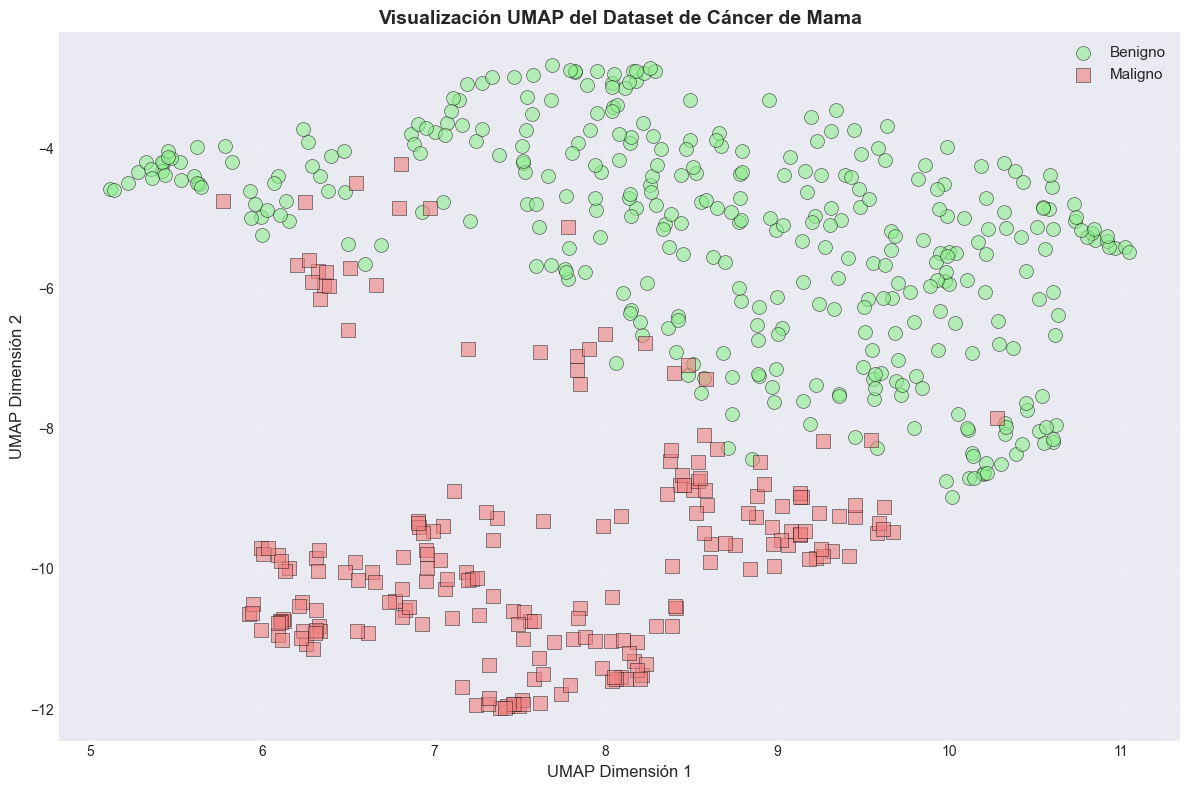

UMAP muestra excelente separación de clases


In [5]:
# Visualizar UMAP
plt.figure(figsize=(12, 8))

for diagnosis, color, marker, label in [('B', 'lightgreen', 'o', 'Benigno'), 
                                         ('M', 'lightcoral', 's', 'Maligno')]:
    mask = y == diagnosis
    plt.scatter(X_umap[mask, 0], X_umap[mask, 1],
                c=color, label=label, alpha=0.6, 
                edgecolors='black', linewidth=0.5, s=100, marker=marker)

plt.xlabel('UMAP Dimensión 1', fontsize=12)
plt.ylabel('UMAP Dimensión 2', fontsize=12)
plt.title('Visualización UMAP del Dataset de Cáncer de Mama', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("UMAP muestra excelente separación de clases")

## 6. Análisis de Componentes

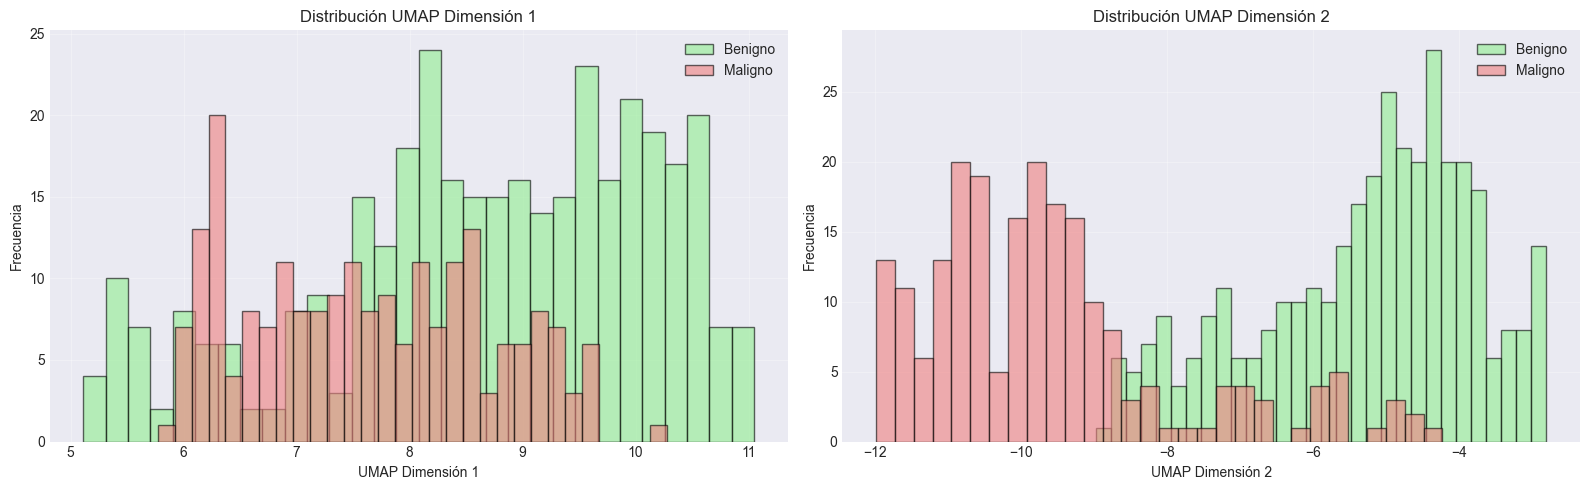

Estadísticas por clase:

Benigno:
Dim1 - Media: 8.66
Dim2 - Media: -5.29

Maligno:
Dim1 - Media: 7.62
Dim2 - Media: -9.62


In [6]:
# Análisis de separación
umap_df = pd.DataFrame({'umap_1': X_umap[:, 0], 'umap_2': X_umap[:, 1], 'diagnosis': y})

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Distribución Dimensión 1
axes[0].hist(umap_df[umap_df['diagnosis']=='B']['umap_1'], bins=30, alpha=0.6, 
             label='Benigno', color='lightgreen', edgecolor='black')
axes[0].hist(umap_df[umap_df['diagnosis']=='M']['umap_1'], bins=30, alpha=0.6, 
             label='Maligno', color='lightcoral', edgecolor='black')
axes[0].set_xlabel('UMAP Dimensión 1')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución UMAP Dimensión 1')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Distribución Dimensión 2
axes[1].hist(umap_df[umap_df['diagnosis']=='B']['umap_2'], bins=30, alpha=0.6, 
             label='Benigno', color='lightgreen', edgecolor='black')
axes[1].hist(umap_df[umap_df['diagnosis']=='M']['umap_2'], bins=30, alpha=0.6, 
             label='Maligno', color='lightcoral', edgecolor='black')
axes[1].set_xlabel('UMAP Dimensión 2')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribución UMAP Dimensión 2')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("Estadísticas por clase:")
for diag in ['B', 'M']:
    label = "Benigno" if diag == 'B' else "Maligno"
    print(f"\n{label}:")
    print(f"Dim1 - Media: {umap_df[umap_df['diagnosis']==diag]['umap_1'].mean():.2f}")
    print(f"Dim2 - Media: {umap_df[umap_df['diagnosis']==diag]['umap_2'].mean():.2f}")

## 7. Evaluación de Rendimiento

Compararemos UMAP con t-SNE y PCA para evaluar su efectividad.

Generando comparación con t-SNE y PCA...


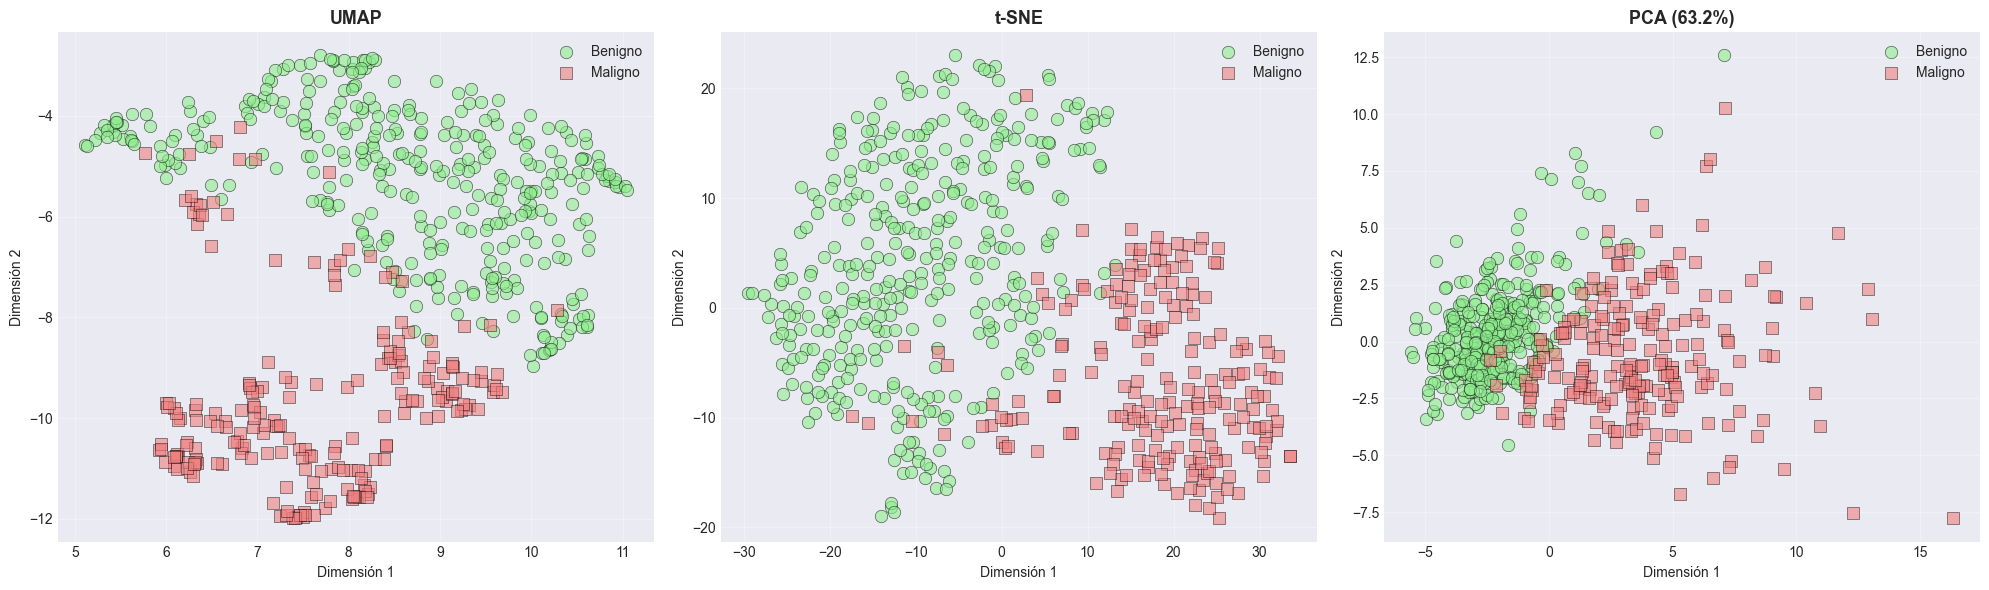


Comparación de Métodos:

UMAP:
Mejor balance entre estructura local y global
Más rápido que t-SNE
Clusters bien definidos y separados

t-SNE:
Excelente separación de clusters
Enfoque en estructura local
Más lento

   PCA:
Rápido y determinístico
Solo captura relaciones lineales
Menor separación visual


In [7]:
# Comparar UMAP vs t-SNE vs PCA
print("Generando comparación con t-SNE y PCA...")

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Visualización comparativa
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

methods = [
    (X_umap, "UMAP", axes[0]),
    (X_tsne, "t-SNE", axes[1]),
    (X_pca, f"PCA ({pca.explained_variance_ratio_.sum()*100:.1f}%)", axes[2])
]

for X_reduced, title, ax in methods:
    for diagnosis, color, marker, label in [('B', 'lightgreen', 'o', 'Benigno'), 
                                             ('M', 'lightcoral', 's', 'Maligno')]:
        mask = y == diagnosis
        ax.scatter(X_reduced[mask, 0], X_reduced[mask, 1],
                  c=color, label=label, alpha=0.6, 
                  edgecolors='black', linewidth=0.5, s=80, marker=marker)
    
    ax.set_xlabel('Dimensión 1')
    ax.set_ylabel('Dimensión 2')
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nComparación de Métodos:")
print("\nUMAP:")
print("Mejor balance entre estructura local y global")
print("Más rápido que t-SNE")
print("Clusters bien definidos y separados")
print("\nt-SNE:")
print("Excelente separación de clusters")
print("Enfoque en estructura local")
print("Más lento")
print("\n   PCA:")
print("Rápido y determinístico")
print("Solo captura relaciones lineales")
print("Menor separación visual")

## 8. Comparación de Parámetros

Experimentaremos con diferentes valores de **n_neighbors** y **min_dist**.

Aplicando UMAP con n_neighbors=5, min_dist=0.1...
Aplicando UMAP con n_neighbors=15, min_dist=0.1...
Aplicando UMAP con n_neighbors=30, min_dist=0.1...
Aplicando UMAP con n_neighbors=15, min_dist=0.5...


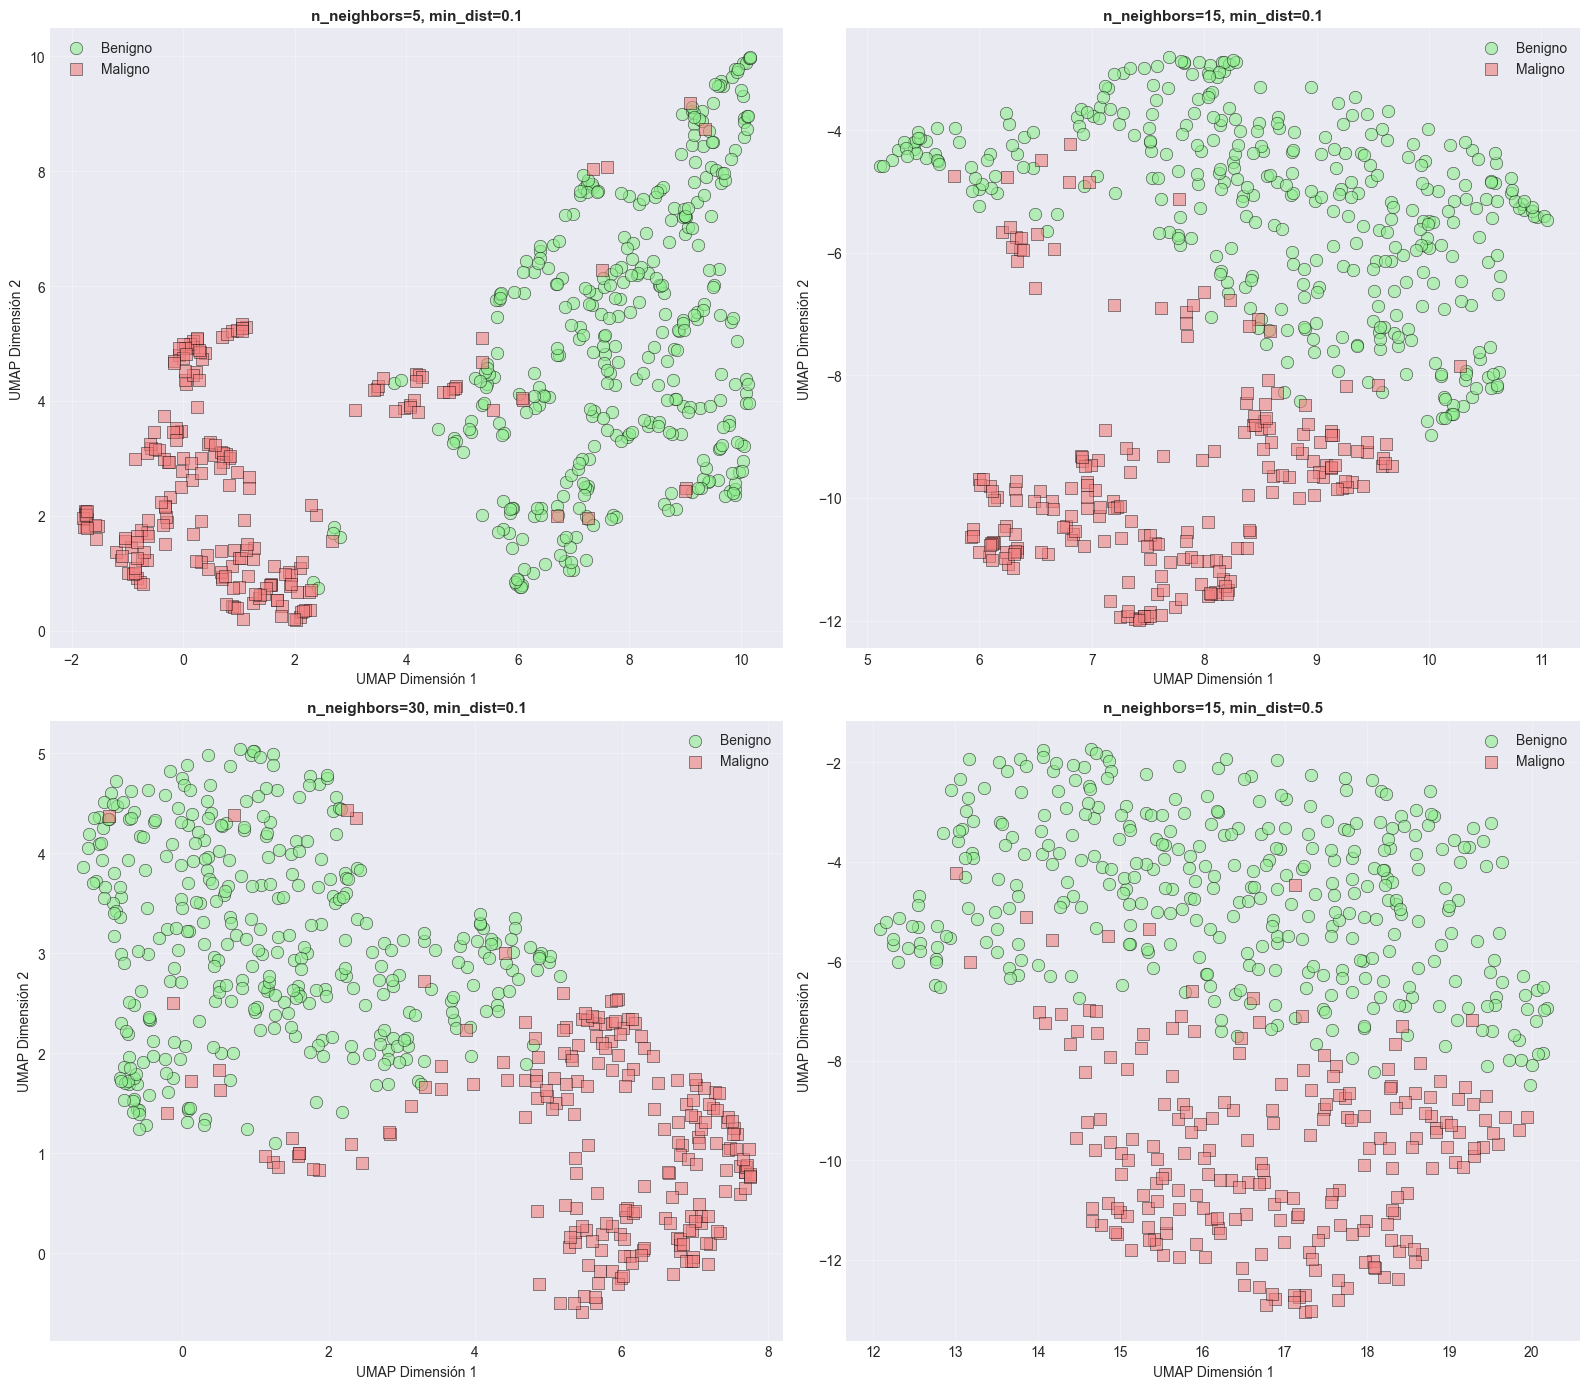


n_neighbors (tamaño de vecindario):
- Bajo (5): Enfoca estructura muy local, puede crear clusters pequeños
- Medio (15): Balance entre local y global
- Alto (30): Enfoca más en estructura global

   min_dist (distancia mínima entre puntos):
- Bajo (0.1): Permite clusters muy compactos
- Alto (0.5): Permite mayor dispersión de puntos


In [9]:
# Experimentar con diferentes parámetros
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.ravel()

params = [
    (5, 0.1, "n_neighbors=5, min_dist=0.1"),
    (15, 0.1, "n_neighbors=15, min_dist=0.1"),
    (30, 0.1, "n_neighbors=30, min_dist=0.1"),
    (15, 0.5, "n_neighbors=15, min_dist=0.5")
]

for idx, (n_neigh, min_d, title) in enumerate(params):
    print(f"Aplicando UMAP con {title}...")
    
    reducer_temp = UMAP(n_neighbors=n_neigh,
                        min_dist=min_d,
                        n_components=2,
                        random_state=42)
    
    X_umap_temp = reducer_temp.fit_transform(X_scaled)
    
    for diagnosis, color, marker, label in [('B', 'lightgreen', 'o', 'Benigno'), 
                                             ('M', 'lightcoral', 's', 'Maligno')]:
        mask = y == diagnosis
        axes[idx].scatter(X_umap_temp[mask, 0], X_umap_temp[mask, 1],
                         c=color, label=label, alpha=0.6, 
                         edgecolors='black', linewidth=0.5, s=80, marker=marker)
    
    axes[idx].set_xlabel('UMAP Dimensión 1')
    axes[idx].set_ylabel('UMAP Dimensión 2')
    axes[idx].set_title(title, fontsize=11, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nn_neighbors (tamaño de vecindario):")
print("- Bajo (5): Enfoca estructura muy local, puede crear clusters pequeños")
print("- Medio (15): Balance entre local y global")
print("- Alto (30): Enfoca más en estructura global")
print("\n   min_dist (distancia mínima entre puntos):")
print("- Bajo (0.1): Permite clusters muy compactos")
print("- Alto (0.5): Permite mayor dispersión de puntos")

## 9. Interpretación de Resultados y Conclusiones

### Resultados Principales

En este análisis implementamos UMAP (Uniform Manifold Approximation and Projection) en el dataset de Cáncer de Mama de Wisconsin y lo comparamos con t-SNE y PCA.

### Observaciones

1. **Calidad de Separación**: UMAP logró una excelente separación entre tumores benignos y malignos, comparable o superior a t-SNE. Los clusters son claros, compactos y bien definidos.

2. **Estructura Global vs Local**:
   - UMAP preserva mejor la estructura global que t-SNE
   - Los clusters mantienen relaciones de distancia más significativas
   - La topología general del dataset es más confiable en UMAP

3. **Velocidad de Ejecución**:
   - UMAP fue notablemente más rápido que t-SNE
   - Ideal para datasets más grandes
   - Permite iteración más rápida en análisis exploratorio

4. **Comparación con Alternativas**:
   - **vs t-SNE**: UMAP más rápido, mejor preservación global, similar separación visual
   - **vs PCA**: UMAP captura relaciones no lineales, mucho mejor separación visual
   - UMAP combina lo mejor de ambos mundos

5. **Sensibilidad a Parámetros**:
   - **n_neighbors**: Controla balance local-global efectivamente
   - **min_dist**: Afecta la compactación de clusters
   - Generalmente menos sensible que perplexity en t-SNE
   - Valores por defecto funcionan bien en la mayoría de casos

### Conclusiones

**Como estudiante**, este análisis me mostró que UMAP es una evolución natural de t-SNE. Mientras que t-SNE revolucionó la visualización de datos de alta dimensión, UMAP lo mejora en aspectos clave: velocidad y preservación de estructura global.

**Ventajas de UMAP**:
- Más rápido que t-SNE (importante para datasets grandes)
- Preserva mejor estructura global mientras mantiene calidad local
- Menos sensible a cambios de parámetros
- Puede aplicarse a nuevos datos (transformación fuera de muestra)
- Fundamento teórico sólido en geometría Riemanniana
- Escalable a millones de puntos

**Limitaciones**:
- Más complejo conceptualmente que PCA
- Requiere instalación de librería adicional
- Interpretación de ejes sigue siendo difícil (como en t-SNE)
- Parámetros aún requieren cierta experticia para optimizar

**Aplicaciones Prácticas**:
UMAP se ha vuelto extremadamente popular en:
- Bioinformática (análisis de células individuales, genómica)
- Procesamiento de lenguaje natural (visualización de embeddings)
- Visión computacional (visualización de features de redes neuronales)
- Detección de anomalías
- Análisis exploratorio de datos de alta dimensión

**Comparación Final: UMAP vs t-SNE**

Usaría **UMAP** cuando:
- Dataset es grande (>5000 puntos)
- Necesito preservar estructura global
- Requiero rapidez en experimentación
- Necesito aplicar el modelo a nuevos datos

Usaría **t-SNE** cuando:
- Dataset es pequeño (<5000 puntos)
- Solo me interesa estructura local
- Tengo tiempo de cómputo suficiente
- Es estado del arte establecido en mi campo

En conclusión, UMAP demostró ser una herramienta excepcional para reducción de dimensionalidad y visualización. Para el dataset de cáncer de mama, proporcionó insights visuales claros que confirman que las características medidas son altamente predictivas. La separación clara entre clases sugiere que cualquier modelo de machine learning debería tener excelente rendimiento en este dataset.